In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt

# POPULAÇÃO:
dataset_sp = pd.read_csv("csv/04-classificados_tratado.csv", sep=",", encoding="iso-8859-1")
dataset_sp.shape

(81231, 28)

In [3]:
dataset_bauru = dataset_sp.loc[dataset_sp.NO_MUNICIPIO_RESIDENCIA == "Bauru"]
dataset_bauru.shape

(701, 28)

TESTES DE NORMALIDADE

Existem testes de normalidade numéricos e testes gráficos:

-Shapiro-Wilk (limite de 5000 amostras)

-Kolmogorov_Smirnov (mais robusto)

-Histograma 

-QQplot

In [ ]:
# Testes de Normalidade
import plotly.express as px
grafico =  px.histogram (dataset_sp,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação') 
grafico.show()

In [ ]:
grafico =  px.histogram (dataset_bauru,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação') 
grafico.show()

<Axes: xlabel='NOTA_REDACAO', ylabel='Probability'>

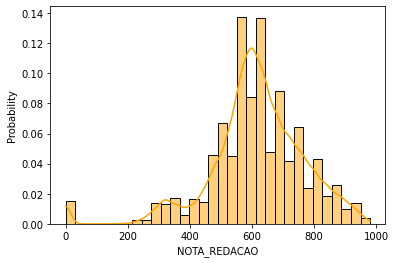

In [ ]:
import seaborn as sns
sns.histplot(dataset_sp, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability")

<Axes: xlabel='NOTA_REDACAO', ylabel='Probability'>

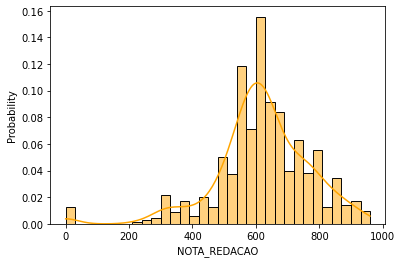

In [ ]:
sns.histplot(dataset_bauru, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability")

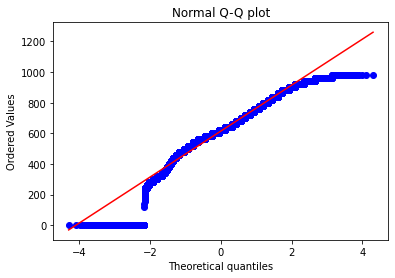

In [ ]:
# Q-Q Plot verifica a normalidade
# Distribuição Normal os Pontos em Azul, teriam de estar em cima da Linha Vermelha
stats.probplot(dataset_sp['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

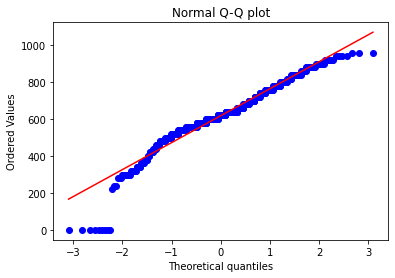

In [ ]:
stats.probplot(dataset_bauru['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

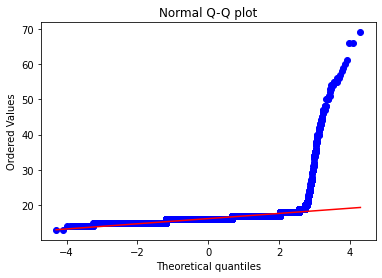

In [ ]:
stats.probplot(dataset_sp['IDADE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

In [ ]:
# Teste não se aplica para SP por ser maior que 5000
# pvalor após a vírgula que se usa para comparar com o p valor
# Não é uma dist. normal pois está elevado a e-15
#  são 15 zeros para depois aparecer na 15ª casa o 101: 0,...101
stats.shapiro(dataset_bauru.NOTA_REDACAO)

ShapiroResult(statistic=0.9432762265205383, pvalue=1.0120334830717804e-15)

### Teste Lilliefors (Kolmogorov_Sminorv)

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

Teste mais atual, sem limitação de tamanho.

In [4]:
# pvalor após a vírgula que se usa para comparar com o p valor
# valor bem menor que 0,05 logo não é uma dist. normal
lilliefors(dataset_sp.NOTA_REDACAO, dist = "norm")

(0.1021841026501294, 0.0009999999999998899)

In [4]:
lilliefors(dataset_bauru.NOTA_REDACAO, dist = "norm")

(0.10819819773409539, 0.0009999999999998899)